In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Ozodiy/HOUSING-PRICE-MODEL/main/housing_data_08-02-2021.csv?token=GHSAT0AAAAAACJ4KDGOJB5PZDVUSM3CMOYOZLDFJZQ')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [3]:
df = df.drop('location', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    7565 non-null   object
 1   rooms       7565 non-null   int64 
 2   size        7565 non-null   object
 3   level       7565 non-null   int64 
 4   max_levels  7565 non-null   int64 
 5   price       7565 non-null   object
dtypes: int64(3), object(3)
memory usage: 354.7+ KB


In [4]:
df['size'].replace('Площадьземли:1сот', np.nan, inplace=True)

In [5]:
df['size']=df['size'].astype('float64')

In [6]:
df['price'].replace('Договорная', np.nan, inplace=True)

In [7]:
df['price'] = df['price'].astype('float64')

In [8]:
df.dropna(inplace=True)

In [9]:
df = df.drop(df[df['size'] > 300] .index)

In [10]:
df = df.drop(df[df['price'] > 175000] .index)

In [11]:
df.corrwith(df['price'])

rooms         0.605548
size          0.770882
level         0.076832
max_levels    0.256660
price         1.000000
dtype: float64

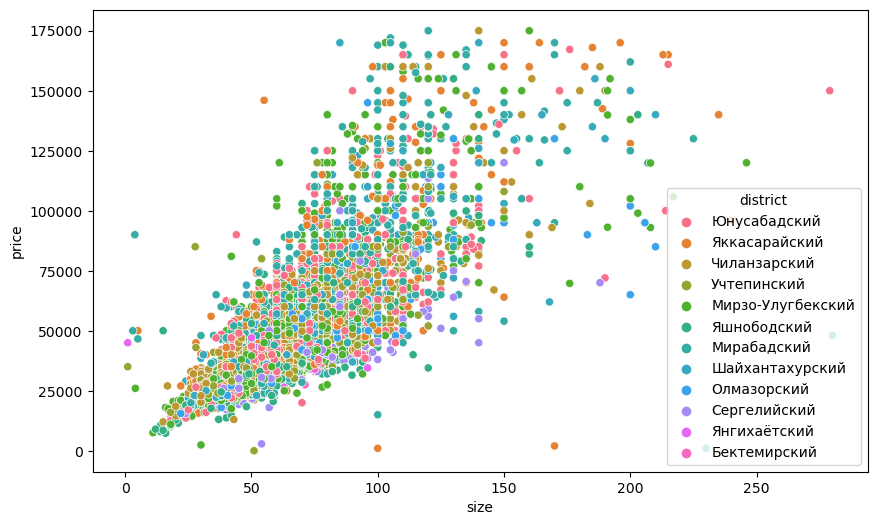

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df['size'], y=df['price'], hue="district")
plt.show()

c:\Users\Komputer\anaconda4\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Komputer\anaconda4\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Komputer\anaconda4\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Komputer\anaconda4\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Komputer\anaconda4\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.4

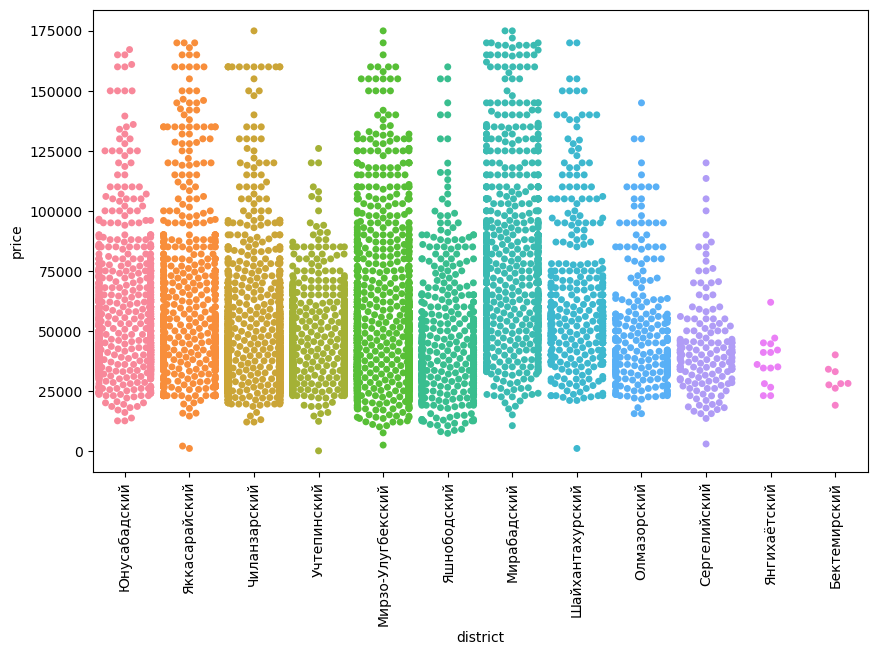

In [13]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, x=df['district'], y=df['price'])
plt.xticks(rotation=90)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=54)
X_train = train_set.drop('price', axis=1)
y = train_set['price'].copy()

X_num = X_train.drop('district', axis=1)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [16]:
#Sonli ustunlar uchun konveyr yaratamiz
num_pipeline = Pipeline([('std_scale',StandardScaler())]) #Qiymatlar oralig'ini standardlashtirish
num_pipeline.fit_transform(X_num)

array([[-0.56133756, -0.55781943, -0.75117973, -1.160796  ],
       [-0.56133756, -0.69825752, -0.30062725, -0.38501484],
       [ 0.40792646,  0.28480911, -0.30062725, -0.38501484],
       ...,
       [ 0.40792646,  0.28480911, -1.2017322 , -0.38501484],
       [ 0.40792646, -0.2067242 , -0.30062725, -0.38501484],
       [-1.53060158, -1.40044798,  0.14992522, -0.77290542]])

In [17]:
# Categorical ustunga pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['district']
full_pipeline = ColumnTransformer([('num',num_pipeline, num_attribs),
                                   ('cat',OneHotEncoder(), cat_attribs)
])

In [18]:
# Ana endi to'lik konveyrni ishga tushuramiz
X_prepared = full_pipeline.fit_transform(X_train)

In [19]:
X_prepared[0:5,:] # Ko'rib turganingizdek, ma'lumotlarni machine leraning tushunadigan numeric ko'rinishga o'tkazdik

array([[-0.56133756, -0.55781943, -0.75117973, -1.160796  ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.56133756, -0.69825752, -0.30062725, -0.38501484,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.40792646,  0.28480911, -0.30062725, -0.38501484,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.53060158, -1.1195718 , -0.30062725, -0.77290542,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.40792646, -0.10139564, -0

In [20]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
LR_Model = LinearRegression()

In [21]:
LR_Model.fit(X_prepared,y)

LinearRegression()

In [22]:
# Tasodifiy 5 ta qator olib solishtirib ko'ramiz
test_data = X_train.sample(5)
test_data

,district,rooms,size,level,max_levels
5435,Учтепинский,2,42.0,4,5
7542,Сергелийский,4,93.0,4,9
7264,Мирабадский,3,85.0,3,9
4802,Чиланзарский,2,52.0,2,4
1483,Чиланзарский,2,52.0,5,5


In [23]:
test_label = y.loc[test_data.index]
test_label

5435    28500.0
7542    79000.0
7264    82000.0
4802    37900.0
1483    36000.0
Name: price, dtype: float64

In [24]:
# Test data ni pipeline dan o'tkazamiz
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[-0.56133756, -0.9791337 ,  0.14992522, -0.38501484,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.37719048,  0.81145196,  0.14992522,  1.16654748,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.40792646,  0.53057577, -0.30062725,  1.16654748,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.56133756, -0.62803848, -0.75117973, -0.77290542,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.56133756, -0.62803848,  0

In [25]:
predicted_data = LR_Model.predict(test_data_prepared)
predicted_data

array([26310.73700274, 57691.71911082, 83122.35221157, 39299.04770747,
       35121.28953394])

In [26]:
# Solishtiramiz
pd.DataFrame({'Predict': predicted_data, 'Real':test_label})

,Predict,Real
5435,26310.737003,28500.0
7542,57691.719111,79000.0
7264,83122.352212,82000.0
4802,39299.047707,37900.0
1483,35121.289534,36000.0


# Modelni Baholash

In [27]:
# Test_set ni ishlatish vaqti keldi;)
# Avval test_setni label qatnashmaganini ajratamiz
X_test = test_set.drop("price", axis=1)


In [28]:
# Endi esa label ni ajratamiz
y_test = test_set['price'].copy()

In [29]:
X_test_prepared = full_pipeline.transform(X_test)

In [30]:
y_predicted = LR_Model.predict(X_test_prepared)

In [31]:
# Bashorat va real datani solishtirish uchun avvalgi bo'limda ko'rgan Root mean square error (RMSE) dan foydalanamiz:.
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test,y_predicted)
# RMSE ni topamiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)


16356.65537439516


#**DecisionTree**

In [32]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared,y)


DecisionTreeRegressor()

**Baholash**

In [33]:
y_predicted = Tree_model.predict(X_test_prepared)

In [34]:
lin_mse = mean_squared_error(y_test,y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

17554.066690242475

#**Random Forest**

In [35]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared,y)

RandomForestRegressor()

**Baholash**

In [36]:
y_predicted = RF_model.predict(X_test_prepared)

In [37]:
lin_mse = mean_squared_error(y_test,y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

13843.278103751367

In [38]:
lin_rmse/df['price'].mean()*100

25.881033015662986